In [1]:
cd /home

/home


In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import json
import os

from core.data  import pretraining_pipeline
from core.layers import positional_encoding

%load_ext autoreload
%autoreload 2

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
dath_path = './data/records/macho/'

In [28]:
batches = pretraining_pipeline(os.path.join(dath_path, 'train'), 
                               10, sampling=True, shuffle=False, window_size=200)

In [37]:
dim_model = 256
for batch, _ in batches.take(1):
    
    new_pe = positional_encoding(batch['times'], 
                                 d_model=dim_model, 
                                 mjd=False, 
                                 v2=True)[0]
    
    old_pe = positional_encoding(batch['times'], 
                                 d_model=dim_model, 
                                 mjd=False, 
                                 v2=False)[0]

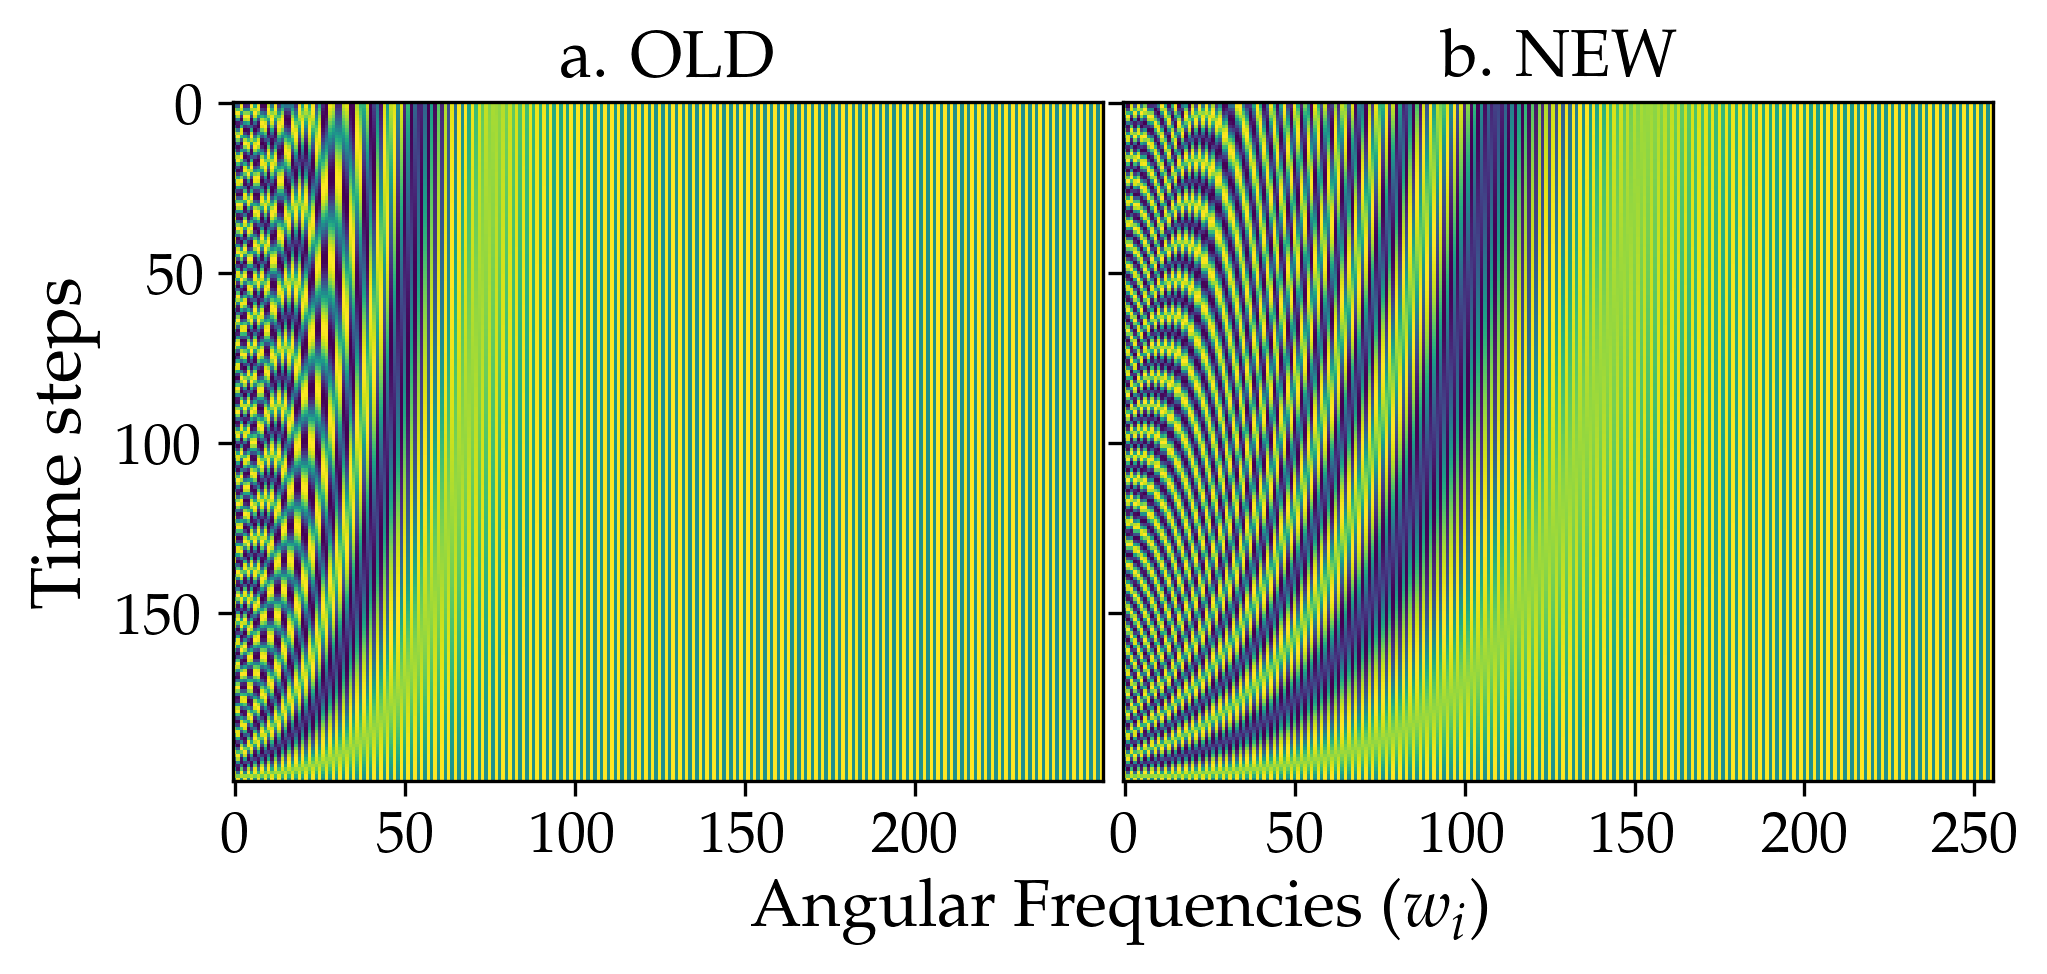

In [38]:
fig, axes = plt.subplots(1,2, figsize=(10,3), 
                         sharey=True, 
                         dpi=300,
                         gridspec_kw={'hspace': 0, 'wspace': -0.38})

n = 200

axes[0].imshow(old_pe[::-1], interpolation='nearest')
axes[0].set_ylabel('Time steps', fontsize=17)
axes[0].set_yticks(range(0, n, 50))
axes[0].set_yticklabels(range(0, n, 50), fontsize=14)
axes[0].set_xticks(np.arange(0, dim_model, 50)[:-1])
axes[0].set_xticklabels(np.arange(0, dim_model, 50)[:-1], fontsize=14)
axes[0].set_title('a. OLD', fontsize=16)

axes[1].imshow(new_pe[::-1], interpolation='nearest')
axes[1].set_xticks(np.arange(0, dim_model, 50))
axes[1].set_xticklabels(np.arange(0, dim_model, 50), fontsize=14)
axes[1].set_title('b. NEW', fontsize=16)
fig.text(0.515, -0.035, 'Angular Frequencies ($w_i$)', ha='center',  fontsize=16)
# fig.savefig('presentation/figures/pe.png', format='png', transparent=True, bbox_inches='tight')
fig.savefig('presentation/figures/pe.pdf', format='pdf', bbox_inches='tight')